### Passo 1 - Importar Arquivos e Bibliotecas

In [3]:
#Importar bibliotecas
import pandas as pd
import win32com.client as win32 #trabalhar como e-mail
import pathlib

In [4]:
email = pd.read_excel(r'Bases de Dados\Emails.xlsx')
lojas = pd.read_csv(r'Bases de Dados\Lojas.csv', encoding = 'latin1', sep = ';')
vendas = pd.read_excel(r'Bases de Dados\Vendas.xlsx')
display(email)
display(lojas)
display(vendas)

,Loja,Gerente,E-mail
0,Iguatemi Esplanada,Helena,testeautomacao.py+helena@gmail.com
1,Shopping Midway Mall,Alice,testeautomacao.py+alice@gmail.com
2,Norte Shopping,Laura,testeautomacao.py+laura@gmail.com
3,Shopping Iguatemi Fortaleza,Manuela,testeautomacao.py+manuela@gmail.com
4,Shopping União de Osasco,Valentina,testeautomacao.py+valentina@gmail.com
5,Shopping Center Interlagos,Sophia,testeautomacao.py+sophia@gmail.com
6,Rio Mar Recife,Isabella,testeautomacao.py+isabella@gmail.com
7,Salvador Shopping,Heloisa,testeautomacao.py+heloisa@gmail.com
8,Rio Mar Shopping Fortaleza,Luiza,testeautomacao.py+luiza@gmail.com
9,Shopping Center Leste Aricanduva,Julia,testeautomacao.py+julia@gmail.com


,ID Loja,Loja
0,1,Iguatemi Esplanada
1,2,Shopping Midway Mall
2,3,Norte Shopping
3,4,Shopping Iguatemi Fortaleza
4,5,Shopping União de Osasco
5,6,Shopping Center Interlagos
6,7,Rio Mar Recife
7,8,Salvador Shopping
8,9,Rio Mar Shopping Fortaleza
9,10,Shopping Center Leste Aricanduva


,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,1,Sapato Estampa,1,358,358
1,1,2019-01-01,1,Camiseta,2,180,360
2,1,2019-01-01,1,Sapato Xadrez,1,368,368
3,2,2019-01-02,3,Relógio,3,200,600
4,2,2019-01-02,3,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,17,Short Listrado,2,102,204
100995,69996,2019-12-26,17,Mochila,4,270,1080
100996,69996,2019-12-26,17,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,11,Camisa Listrado,1,108,108


### Passo 2 - Definir criar uma tabela para cada loja e Definir o dia do indicador

In [5]:
#Incluir nome da loja me Vendas
vendas = vendas.merge(lojas, on = 'ID Loja')

In [6]:
dicionario_loja = {}
for loja in lojas['Loja']:
    dicionario_loja[loja]=vendas.loc[vendas['Loja']==loja,:]
    
#display(dicionario_loja['Shopping Eldorado'])

In [7]:
#Selecionar o dia mais próximo
dia_indicador = vendas['Data'].max()
print(dia_indicador)

2019-12-26 00:00:00


### Passo 3 - Salvar a planilha na pasta de backup

In [8]:
#identificar se a pasta ja existe


caminho_backup = pathlib.Path(r'Backup Arquivos Lojas') #Caminho onde devera ser procurada as pastas

arquivos_pasta_backup = caminho_backup.iterdir() 

#lista_nome = [arquivo.name for arquivo in arquivos_pasta_backup] ---- Lista compren
lista_nome = []
for arquivo in arquivos_pasta_backup:
    lista_nome.append(arquivo.name)  #Criando  uma lista para verificar quais lojas ja tem sua pasta criada
    

for loja in dicionario_loja:
    if loja not in lista_nome:
        nova_pasta = caminho_backup / loja # O pacote 'pathlib' nos permite junta os dois caminhos usando '/' 
        nova_pasta.mkdir()
        
        
    #salvar dentro da pasta
    nome_arquivo = '{}_{}_{}.xlsx'.format(dia_indicador.month,dia_indicador.day,loja) #Criando o arquivo de cada loja
    local_arquivo = caminho_backup/loja/nome_arquivo # Indicando o local a ser add
    dicionario_loja[loja].to_excel(local_arquivo) #Tranformando em um Excel na pasta
        



### Passo 4 - Calcular o indicador para 1 loja

In [9]:
#Definição da meta
Meta_faturamento_Dia = 1000
Meta_faturamento_Ano = 1650000
Meta_qnt_dia = 4
Meta_qnt_ano = 120
Meta_ticketMedio = 500

#display(venda_loja)

### Passo 5 - Enviar por e-mail para o gerente

### Enviando o e-mail para os gerentes

In [23]:
for loja in dicionario_loja:

    venda_loja = dicionario_loja[loja]
    venda_loja_dia = venda_loja.loc[venda_loja['Data']==dia_indicador,:]
    #Faturamento
    Faturamento_ano = venda_loja['Valor Final'].sum()
    Faturamento_dia = venda_loja_dia['Valor Final'].sum()
    #print(Faturamento_ano)
    #print(Faturamento_dia)

    #Diversidade de produtos
    prod_anos = len(venda_loja['Produto'].unique()) #Verificando o tamnho dos valores duplicados, ou seja quantidade de produtos
    prod_dias = len(venda_loja_dia['Produto'].unique())

    #print(prod_anos)
    #print(prod_dias)

    #ticket médio
    valor_venda = venda_loja.groupby('Código Venda').sum()
    #display(valor_venda)
    ticket_médio_anual = valor_venda['Valor Final'].mean()
    #print(ticket_médio_anual)

    valor_venda_dia = venda_loja_dia.groupby('Código Venda').sum()
    ticket_médio_dia = valor_venda_dia['Valor Final'].mean()
    #print(ticket_médio_dia)
    
    
    ##------Enviar o email-----##
    outlook = win32.Dispatch('outlook.application')
    nome = email.loc[email['Loja']==loja,'Gerente'].values[0]
    mail = outlook.CreateItem(0)
    mail.To = email.loc[email['Loja']==loja,'E-mail'].values[0]
    mail.Subject = 'OnePage Dia {}/{} - Loja {}'.format(dia_indicador.day,dia_indicador.month,loja)
    #mail.Body = 'Texto do E-mail'

    #Definindo as cores
    if Faturamento_dia>=Meta_faturamento_Dia:
        cor_fat_dia = "green"
    else:
        cor_fat_dia = "red"

    if Faturamento_ano>=Meta_faturamento_Ano:
        cor_fat_ano = "green"
    else:
        cor_fat_ano = "red"

    if ticket_médio_dia>=Meta_ticketMedio:
        cor_ticket_dia = "green"
    else:
        cor_ticket_dia = "red"
    if ticket_médio_anual>=Meta_ticketMedio:
        cor_ticket_ano = "green"
    else:
        cor_ticket_ano = "red"

    if prod_dias>=Meta_qnt_dia:
        cor_prod_dia = "green"
    else:
        cor_prod_dia = "red"

    if prod_anos>=Meta_qnt_ano:
        cor_prod_ano = "green"
    else:
        cor_prod_ano= "red"
    mail.HTMLBody = f'''
    <p>Bom dia, {nome}</p>


    <p>O resultado de ontem <strong>({dia_indicador.day}/{dia_indicador.month})</strong> da Loja <strong>{loja}</strong> foi:</p> 

    <table>
      <tr>
        <th>Indicador</th>
        <th>Valor Dia</th>
        <th>Meta Dia</th>
        <th>Cenário</th>
      </tr>
      <tr>
        <td>Faturamento</td>
        <td style="text-align: center">R${Faturamento_dia:.2f}</td>
        <td style="text-align: center">R${Meta_faturamento_Dia:.2f}</td>
        <td style="text-align: center"><font color="{cor_fat_dia}">◙</font></td></td>
      </tr>
      <tr>
        <td>Diversidade de Produtos</td>
        <td style="text-align: center">{prod_dias}</td>
        <td style="text-align: center">{Meta_qnt_dia}</td>
        <td style="text-align: center"><font color="{cor_prod_dia}">◙</font></td>
      </tr>
      <tr>
        <td>Ticket Médio</td>
        <td style="text-align: center">R${ticket_médio_dia:.2f}</td>
        <td style="text-align: center">R${Meta_ticketMedio:.2f}</td>
        <td style="text-align: center"><font color="{cor_ticket_dia}">◙</font></td>
      </tr>

    </table>
    <br>
    <table>
      <tr>
        <th>Indicador</th>
        <th>Valor Ano</th>
        <th>Meta Ano</th>
        <th>Cenário</th>
      </tr>
      <tr>
        <td>Faturamento</td>
        <td style="text-align: center">R${Faturamento_ano:.2f}</td>
        <td style="text-align: center">R${Meta_faturamento_Ano:.2f}</td>
        <td style="text-align: center"><font color="{cor_fat_ano}">◙</font></td></td>
      </tr>
      <tr>
        <td>Diversidade de Produtos</td>
        <td style="text-align: center">{prod_anos}</td>
        <td style="text-align: center">{Meta_qnt_ano}</td>
        <td style="text-align: center"><font color="{cor_prod_ano}">◙</font></td>
      </tr>
      <tr>
        <td>Ticket Médio</td>
        <td style="text-align: center">R${ticket_médio_anual:.2f}</td>
        <td style="text-align: center">R${Meta_ticketMedio:.2f}</td>
        <td style="text-align: center"><font color="{cor_ticket_ano}">◙</font></td>
      </tr>

    </table>
    <p>Segue em anexo a planilha com todos os dados para mais detalhes.</p>
    <p>Qualquer dúvida estou à disposição.</p>
    <p>Att., Jorge</p>
    '''

    # Anexos (pode colocar quantos quiser):
    attachment  = pathlib.Path.cwd() / caminho_backup / loja / f'{dia_indicador.month}_{dia_indicador.day}_{loja}.xlsx'
    mail.Attachments.Add(str(attachment))

    mail.Send()
    
    print("E-mail da Loja {} enviado".format(loja))

E-mail da Loja Iguatemi Esplanada enviado
E-mail da Loja Shopping Midway Mall enviado
E-mail da Loja Norte Shopping enviado
E-mail da Loja Shopping Iguatemi Fortaleza enviado
E-mail da Loja Shopping União de Osasco enviado
E-mail da Loja Shopping Center Interlagos enviado
E-mail da Loja Rio Mar Recife enviado
E-mail da Loja Salvador Shopping enviado
E-mail da Loja Rio Mar Shopping Fortaleza enviado
E-mail da Loja Shopping Center Leste Aricanduva enviado
E-mail da Loja Ribeirão Shopping enviado
E-mail da Loja Shopping Morumbi enviado
E-mail da Loja Parque Dom Pedro Shopping enviado
E-mail da Loja Bourbon Shopping SP enviado
E-mail da Loja Palladium Shopping Curitiba enviado
E-mail da Loja Passei das Águas Shopping enviado
E-mail da Loja Center Shopping Uberlândia enviado
E-mail da Loja Shopping Recife enviado
E-mail da Loja Shopping Vila Velha enviado
E-mail da Loja Shopping SP Market enviado
E-mail da Loja Shopping Eldorado enviado
E-mail da Loja Shopping Ibirapuera enviado
E-mail da L

In [9]:
# print(pathlib.Path.cwd()/caminho_backup/loja/f'{dia_indicador.month}_{dia_indicador.day}_{loja}.xlsx')

### Criando um ranking para diretoria

In [24]:
faturamento_lojas = vendas.groupby('Loja')[['Loja','Valor Final']].sum()
faturamento_lojas_ano = faturamento_lojas.sort_values(by = 'Valor Final',ascending = False)
display(faturamento_lojas_ano)
#Criando um arquivo xlsx em uma pasta
nome_arquivo1 = '{}_{}_Ranking Anual.xlsx'.format(dia_indicador.month,dia_indicador.day,loja) #Criando o arquivo de cada loja
faturamento_lojas_ano.to_excel(r'Backup Arquivos Lojas\{}'.format(nome_arquivo1)) #Tranformando em um Excel na pasta

vendas_dia = vendas.loc[vendas['Data']==dia_indicador,:]
faturamento_lojas_dia = vendas_dia.groupby('Loja')[['Loja','Valor Final']].sum()
faturamento_lojas_dia = faturamento_lojas_dia.sort_values(by='Valor Final',ascending=False)
display(faturamento_lojas_dia)

nome_arquivo2 = '{}_{}_Ranking Diario.xlsx'.format(dia_indicador.month,dia_indicador.day,loja) #Criando o arquivo de cada loja
faturamento_lojas_dia.to_excel(r'Backup Arquivos Lojas\{}'.format(nome_arquivo2)) #Tranformando em um Excel na pasta

,Valor Final
Loja,
Iguatemi Campinas,1762419
Shopping Vila Velha,1731167
Bourbon Shopping SP,1726110
Rio Mar Recife,1722766
Shopping SP Market,1721763
Palladium Shopping Curitiba,1721120
Norte Shopping,1711968
Ribeirão Shopping,1707122
Iguatemi Esplanada,1699681


,Valor Final
Loja,
Salvador Shopping,3950
Novo Shopping Ribeirão Preto,3400
Center Shopping Uberlândia,2651
Shopping Eldorado,2391
Shopping Center Interlagos,1582
Shopping Recife,1366
Norte Shopping,1259
Shopping União de Osasco,1207
Shopping Vila Velha,937


### Enviar e-mail para diretoria

In [25]:
outlook = win32.Dispatch('outlook.application')

mail = outlook.CreateItem(0)
mail.To = email.loc[email['Loja']=='Diretoria', 'E-mail'].values[0]
mail.Subject = f'Ranking Dia {dia_indicador.day}/{dia_indicador.month}'
mail.Body = f'''
Prezados, bom dia

Melhor loja do Dia em Faturamento: Loja {faturamento_lojas_dia.index[0]} com Faturamento R${faturamento_lojas_dia.iloc[0, 0]:.2f}
Pior loja do Dia em Faturamento: Loja {faturamento_lojas_dia.index[-1]} com Faturamento R${faturamento_lojas_dia.iloc[-1, 0]:.2f}

Melhor loja do Ano em Faturamento: Loja {faturamento_lojas_ano.index[0]} com Faturamento R${faturamento_lojas_ano.iloc[0, 0]:.2f}
Pior loja do Ano em Faturamento: Loja {faturamento_lojas_ano.index[-1]} com Faturamento R${faturamento_lojas_ano.iloc[-1, 0]:.2f}

Segue em anexo os rankings do ano e do dia de todas as lojas.

Qualquer dúvida estou à disposição.

Att., Jorge.
'''
# Anexos (pode colocar quantos quiser):
attachment  = pathlib.Path.cwd() / caminho_backup / f'{dia_indicador.month}_{dia_indicador.day}_Ranking Anual.xlsx'
mail.Attachments.Add(str(attachment))
attachment  = pathlib.Path.cwd() / caminho_backup / f'{dia_indicador.month}_{dia_indicador.day}_Ranking Diario.xlsx'
mail.Attachments.Add(str(attachment))

mail.Send()
print("E-mail da Diretoria enviado")

E-mail da Diretoria enviado


### OBRIGADO :D


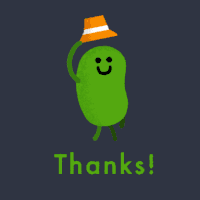